In [184]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

# Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)

# Pre cleaned the dataset by selecting significant columns
df2 = df1[['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
           'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome',
           'NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

# Converting strings to categorical values
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df2['Attrition'] = number.fit_transform(df2['Attrition'].astype('str'))
df2.head()

Populating the interactive namespace from numpy and matplotlib


F:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['number', 'negative', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,8,Yes,11,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,1,No,23,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,6,Yes,15,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,1,Yes,11,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,9,No,12,4,6,3,2,2,2,2


In [185]:
# Replacing numeric categorical features data with categorical values

grade = {"Education":{1: "Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"},
       "EnvironmentSatisfaction":{1: "Low", 2:"Medium", 3:"High", 4:"Very High"},
       "JobInvolvement":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, 
       "JobSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},  
       "RelationshipSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},
       "WorkLifeBalance":  {1: "Bad", 2:"Good", 3:"Better", 4:"Best"},
      }
df2.replace(grade, inplace=True)
df2.head()

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,...,8,Yes,11,Low,8,Bad,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,...,1,No,23,Very High,10,Better,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,...,6,Yes,15,Medium,7,Better,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,...,1,Yes,11,High,8,Better,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,...,9,No,12,Very High,6,Better,2,2,2,2


In [186]:
# Creating dummy variables on categorical data for easy interpretation

final_data = pd.get_dummies(df2, columns =['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
                                     'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                                     'RelationshipSatisfaction', 'WorkLifeBalance'])
final_data.head()

,Age,Attrition,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,49,0,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,37,1,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,33,0,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,27,0,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


In [187]:
# Move the reponse variable "Attrition" to the front of the table

front = final_data['Attrition']
final_data.drop(labels=['Attrition'], axis=1, inplace = True)
final_data.insert(0, 'Attrition', front)
final_data.head()

,Attrition,Age,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,41,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,0,49,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,1,37,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,33,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,0,27,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

# Defining the first parameter 

X = final_data.iloc[:, 1:65].values
print("X: ", type(X), X.shape)

X:  <class 'numpy.ndarray'> (1470, 64)


In [189]:
# Defining the second parameter 

y = final_data.iloc[:, 0].values
print("y: ", type(y), y.shape)

y:  <class 'numpy.ndarray'> (1470,)


In [190]:
final_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Logistic Regression Base Line Model using 'L2' regularization

In [191]:
# Split the data into training and test sets
# Stratify parameter makes a split so that proportion of values in the sample produced will be same as proportion of values
# provided to parameter stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, stratify=y)

# Build the Logistic Regression Model using default 'L2' regularization

classifier = LogisticRegression()

# Fit the model on the trainng data.
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
# Print the accuracy from the testing data.
y_predict_test = classifier.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test, y_test))

# Print the accuracy from the training data.
y_predict_train = classifier.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.895644283122


**I will dive more deeply and evaluate the performance of binary classifiers by computing a confusion matrix and generating a classification report.**

In [193]:
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# confusion matrix for test data using default 'L2' regularization
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_test)
confusion_matrix

array([[298,  11],
       [ 36,  23]], dtype=int64)

*Confusion matrix for test data using 'L2' regularization tells us that 298+23 are correct predictions and 36+11 are incorrect predictions.*

In [194]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



*From above Classification Report, we find that training performance metrics are--as expected--slightly better than their test set counterpart in terms of accuracy score.*

*But at the same time, we also notice that the recall for the positive class is constantly below 50%, which is not significantly good.*

*Overall from the analysis report, we see that the result of minority class is not very good and this is probably due to the fact that there is an imbalance in the classes where one class is very large than other.*

### Logistic Regression Base Line Model using 'L1' regularization

In [195]:
# Build the Logistic Regression Model using 'L1' regularization
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

classifier_1 = LogisticRegression(penalty = 'l1')

# Fit the model on the trainng data.
classifier_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [196]:
# Checking the model's accuracy from the testing data.
y_predict_test_1 = classifier_1.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test_1, y_test))

# Checking the model's accuracy from the training data.
y_predict_train_1 = classifier_1.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train_1, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.893829401089


In [197]:
# confusion matrix for test data using 'L1' regularization
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_test_1)
confusion_matrix

array([[298,  11],
       [ 36,  23]], dtype=int64)

*Confusion matrix for test data using 'L1' regularization tells us that 298+23 are correct predictions and 36+11 are incorrect predictions.*

In [198]:
# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train_1))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test_1))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.44      0.57       178

avg / total       0.89      0.89      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



*From above Classification Report, we find that training performance metrics are--as expected--slightly better than their test set counterpart in terms of accuracy score.*

*But at the same time, we also notice that the recall for the positive class is constantly below 50%, which is not significantly good.*

*Overall from the analysis report, we see that the result of minority class is not very good and this is probably due to the fact that there is an imbalance in the classes where one class is very large than other.*

### Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L2' regularization

In [199]:
# Trying to estimate how this model will predict on unseen data by tuning the model

from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

{'C': [0.001, 0.1, 1, 10, 100]}


In [200]:
# instantiate the grid
classifier_gcv = LogisticRegression()
grid = GridSearchCV(classifier_gcv, param_grid, scoring='accuracy')

In [201]:
# Fit the model on the trainng data.
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [202]:
grid.grid_scores_

[mean: 0.83938, std: 0.00205, params: {'C': 0.001},
 mean: 0.86298, std: 0.01018, params: {'C': 0.1},
 mean: 0.86751, std: 0.00902, params: {'C': 1},
 mean: 0.86570, std: 0.00937, params: {'C': 10},
 mean: 0.86661, std: 0.01164, params: {'C': 100}]

In [203]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.867513611615245
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [204]:
classifier_gcv_1 = LogisticRegression(C=1)
classifier_gcv_1.fit(X_train, y_train)
print(accuracy_score(classifier_gcv_1.predict(X_test), y_test))

0.872282608696


In [205]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, classifier_gcv_1.predict(X_train)))

print("[Test Classification Report:]")
print(classification_report(y_test, classifier_gcv_1.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



### Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L1' regularization

In [206]:
# Trying to estimate how this model will predict on unseen data by tuning the model

from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

{'C': [0.001, 0.1, 1, 10, 100]}


In [207]:
# instantiate the grid
classifier_1_gcv = LogisticRegression(penalty = 'l1')
grid_1 = GridSearchCV(classifier_1_gcv, param_grid, scoring='accuracy')

In [208]:
# Fit the model on the trainng data.
grid_1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [209]:
grid_1.grid_scores_

[mean: 0.83848, std: 0.00108, params: {'C': 0.001},
 mean: 0.85209, std: 0.01038, params: {'C': 0.1},
 mean: 0.87114, std: 0.00522, params: {'C': 1},
 mean: 0.86116, std: 0.01113, params: {'C': 10},
 mean: 0.85935, std: 0.00902, params: {'C': 100}]

In [210]:
# examine the best model
print(grid_1.best_score_)
print(grid_1.best_params_)
print(grid_1.best_estimator_)

0.8711433756805808
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [211]:
classifier_1_gcv_1 = LogisticRegression(penalty = 'l1', C=1)
classifier_1_gcv_1.fit(X_train, y_train)
print(accuracy_score(classifier_1_gcv_1.predict(X_test), y_test))

0.872282608696


In [212]:
# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, classifier_1_gcv_1.predict(X_train)))

print("[Test Classification Report:]")
print(classification_report(y_test, classifier_1_gcv_1.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.44      0.57       178

avg / total       0.89      0.89      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



### Feature Importance for a logistic regression model using 'L2' regularization

In [213]:
classifier_fi = LogisticRegression()
# Fit the model on the trainng data.
classifier_fi.fit(X_train, y_train)
# Using Scikit-Learn to find Coefficient with indices
df_coefs = pd.DataFrame(classifier_fi.coef_[0], index= final_data.iloc[:, 1:65].columns, columns=['Coefficient'])
# Sorting Coefficient in descending order
df_sorted = df_coefs.sort_values('Coefficient', ascending= False)
print(df_sorted)

                                    Coefficient
OverTime_Yes                           1.105801
JobInvolvement_Low                     0.965035
MaritalStatus_Single                   0.874477
EnvironmentSatisfaction_Low            0.869302
RelationshipSatisfaction_Low           0.850258
JobSatisfaction_Low                    0.761273
BusinessTravel_Travel_Frequently       0.669466
JobRole_Sales Representative           0.650355
WorkLifeBalance_Bad                    0.648171
JobRole_Laboratory Technician          0.575997
EducationField_Technical Degree        0.521560
Education_Bachelor                     0.342879
JobRole_Human Resources                0.320819
EducationField_Marketing               0.302172
Gender_Male                            0.296724
EducationField_Human Resources         0.279759
Department_Human Resources             0.268402
Department_Sales                       0.222793
NumCompaniesWorked                     0.194319
YearsSinceLastPromotion                0

In [214]:
# Separate and sort the positive and negative ones coefficients by absolute value

# Function for seperating positive and negative Coefficient
# Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html 

def positive(value):
    return max(value, 0)

def negative(value):
    return min(value, 0)
# Map value of 'df_sorted' using input function 'positive'
df_sorted['positive'] = df_sorted['Coefficient'].map(positive)
# Map value of 'df_sorted' using input function 'negative'
df_sorted['negative'] = df_sorted['Coefficient'].map(negative)
# Get absolute value of negative coefficients 
df_sorted['negative_abs'] = df_sorted['negative'].abs()

In [215]:
# Top 5 positive coefficients
df_positive_top_5 = df_sorted.nlargest(5,'positive')
df_positive_top_5_filter = df_positive_top_5['positive']
df_positive_top_5_filter

OverTime_Yes                    1.105801
JobInvolvement_Low              0.965035
MaritalStatus_Single            0.874477
EnvironmentSatisfaction_Low     0.869302
RelationshipSatisfaction_Low    0.850258
Name: positive, dtype: float64

In [216]:
# Top 5 negative coefficients
df_negative_top_5 = df_sorted.nlargest(5,'negative_abs')
df_negative_top_5_filter = df_negative_top_5['negative_abs']
df_negative_top_5_filter

OverTime_No                  0.965188
JobSatisfaction_Very High    0.701842
BusinessTravel_Non-Travel    0.630154
JobInvolvement_Very High     0.606149
WorkLifeBalance_Better       0.584350
Name: negative_abs, dtype: float64

### Feature Importance for a logistic regression model using 'L1' regularization

In [217]:
classifier_fi_1 = LogisticRegression(penalty = 'l1')
# Fit the model on the trainng data.
classifier_fi_1.fit(X_train, y_train)
# Using Scikit-Learn to find Coefficient with indices
df_coefs_1 = pd.DataFrame(classifier_fi_1.coef_[0], index= final_data.iloc[:, 1:65].columns, columns=['Coefficient'])
# Sorting Coefficient in descending order
df_sorted_1 = df_coefs_1.sort_values('Coefficient', ascending= False)
print(df_sorted_1)

                                    Coefficient
OverTime_Yes                           1.355411
MaritalStatus_Single                   1.074336
EnvironmentSatisfaction_Low            1.069124
JobRole_Sales Representative           1.025290
JobInvolvement_Low                     1.023394
RelationshipSatisfaction_Low           0.995030
JobRole_Laboratory Technician          0.667987
JobSatisfaction_Low                    0.634503
JobRole_Human Resources                0.623780
WorkLifeBalance_Bad                    0.605329
BusinessTravel_Travel_Frequently       0.591885
Education_Bachelor                     0.312237
EducationField_Technical Degree        0.201384
NumCompaniesWorked                     0.190719
YearsSinceLastPromotion                0.145296
DistanceFromHome                       0.049682
YearsAtCompany                         0.032514
HourlyRate                             0.002667
EnvironmentSatisfaction_Medium         0.000000
WorkLifeBalance_Good                   0

In [218]:
# Separate and sort the positive and negative ones coefficients by absolute value

# Function for seperating positive and negative Coefficient
# Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html 

def positive(value):
    return max(value, 0)

def negative(value):
    return min(value, 0)
# Map value of 'df_sorted' using input function 'positive'
df_sorted_1['positive'] = df_sorted_1['Coefficient'].map(positive)
# Map value of 'df_sorted_1' using input function 'negative'
df_sorted_1['negative'] = df_sorted_1['Coefficient'].map(negative)
# Get absolute value of negative coefficients 
df_sorted_1['negative_abs'] = df_sorted_1['negative'].abs()

In [219]:
# Top 5 positive coefficients
df_pve_top_5 = df_sorted_1.nlargest(5,'positive')
df_pve_top_5_filter = df_pve_top_5['positive']
df_pve_top_5_filter

OverTime_Yes                    1.355411
MaritalStatus_Single            1.074336
EnvironmentSatisfaction_Low     1.069124
JobRole_Sales Representative    1.025290
JobInvolvement_Low              1.023394
Name: positive, dtype: float64

In [220]:
# Top 5 negative coefficients
df_nve_top_5 = df_sorted_1.nlargest(5,'negative_abs')
df_nve_top_5_filter = df_nve_top_5['negative_abs']
df_nve_top_5_filter

JobSatisfaction_Very High    0.785793
JobInvolvement_Very High     0.733655
OverTime_No                  0.708129
BusinessTravel_Non-Travel    0.677771
WorkLifeBalance_Better       0.651207
Name: negative_abs, dtype: float64

*From the above feature importance analysis report, we see that features like OverTime_Yes, JobInvolvement_Low with the high positive coefficients (towards attrition) makes some sense and are somewhat correlated to the things which influence employees to leave the company in short duration of time.*

*On the other hands, we also see that the features like OverTime_No, JobSatisfaction_Very High, JobInvolvement_Very High with high (absolute value) negative coefficients (towards non-attrition) makes sense too and are somewhat correlated to the things which influence employees to stay at the company for the longer duration of time.*

*In short, we can say that model has good understandability.*

**Note:** Feature Importance

**1.**The one with the negative coefficient having the highest absolute weighted value will contribute the most important    feature as belonging to class 0 (employees who have not left the company).

**2.**The one with the positive coefficient having the highest absolute weighted value  will contribute the most important feature as belonging to class 1 (employees who have left the company)

**Summary:**

From the above work done, I can say that we are able to build a logistic regression model with an accuracy of around 87%. Also, the training performance is better than test performance which does indicate that model is neither over-fitting nor erroneous.

However, Class 1 (minority class) recall and F1 score are not so good when compared to Class 0 (majority) recall and F1 score. This means that Class 0 (majority class) data has overinfluenced the model.

I also worked on finding feature importance which helped me with some top features with their weight and how much they influence the model.

### ROC Graph using Different Models

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.85


In [222]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Decision Tree Accuracy(CART): {:.2f}'.format(accuracy_score(y_test, dtree.predict(X_test))))

Decision Tree Accuracy(CART): 0.77


In [223]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_score(y_test, ada.predict(X_test))))

AdaBoost Accuracy: 0.87


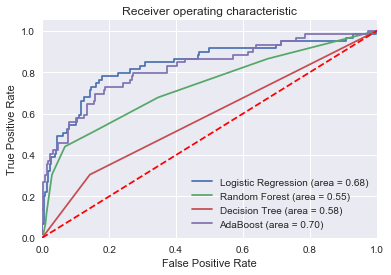

In [268]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])


dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

*From the above ROC Graph , we see AdaBoost Model has highest AUC value of 0.70 and it is closest to the top left corner which is one of the creteria for a good model. Next good model as per ROC curve is the Logistic Regression model.*

*Next I will use **SMOTE(Synthetic Minority Over-sampling Technique)** algorithm to combat Imbalanced Classes in my Machine Learning Dataset and test the model based on the modified data sample.*

### Balance the dataset using SMOTE

In [287]:
# Count the number of occurrence of the list items

from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_sample(X_train,y_train)
print('Rebalanced Dataset {}'.format(Counter(y_sm)))

Rebalanced Dataset Counter({0: 924, 1: 924})


In [298]:
# Logistic Regression on Balance Dataset
classifier_sm = LogisticRegression()
classifier_sm.fit(x_sm, y_sm)
print("[Train Classification Report:]")
print(classification_report(y_sm, classifier_sm.predict(x_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.83      0.82      0.82       924
          1       0.82      0.83      0.83       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.95      0.80      0.86       309
          1       0.42      0.76      0.54        59

avg / total       0.86      0.79      0.81       368



In [297]:
# Logistic Regression on Balance Dataset using 'L1' regularization
classifier_sm_1 = LogisticRegression(penalty = 'l1')
classifier_sm_1.fit(x_sm, y_sm)
print("[Train Classification Report:]")
print(classification_report(y_sm, classifier_sm_1.predict(x_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm_1.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.83      0.81      0.82       924
          1       0.82      0.84      0.83       924

avg / total       0.83      0.83      0.83      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.94      0.81      0.87       309
          1       0.43      0.75      0.55        59

avg / total       0.86      0.80      0.82       368



** AdaBoost Model Performance on Balance Dataset using SMOTE **

In [295]:
classifier_sm_ada = AdaBoostClassifier()
classifier_sm_ada.fit(x_sm, y_sm)

# Print the accuracy from the testing data.
y_predict_test_sm = classifier_sm_ada.predict(X_test)
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test_sm, y_test))
print("\n")

# Print the accuracy from the training data.
y_predict_train_sm = classifier_sm_ada.predict(X_train)
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train_sm, y_train))
print("\n")

print("[Training Classification Report:]")
print(classification_report(y_sm, classifier_sm_ada.predict(x_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm_ada.predict(X_test)))

[Test] Accuracy score: 0.850543478261


[Training] Accuracy score: 0.882032667877


[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       924
          1       0.94      0.91      0.93       924

avg / total       0.93      0.93      0.93      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.91      0.91      0.91       309
          1       0.53      0.54      0.54        59

avg / total       0.85      0.85      0.85       368



From above Classification Report, we find that training performance metrics are--as expected--slightly better than their test set counterpart in terms of accuracy score.
And this time, we noticed that the recall for both Class 01 and 1 are similar to Precision values of respective class.
So how well Classifier predict about employee leaving and when a employee leaves, how well classifier predict it, both the conditions are handled better by this new model.

But the Prediction and Recall for Minority Class (Class 1) is still not very good compared to Class 0 precision and Recall.